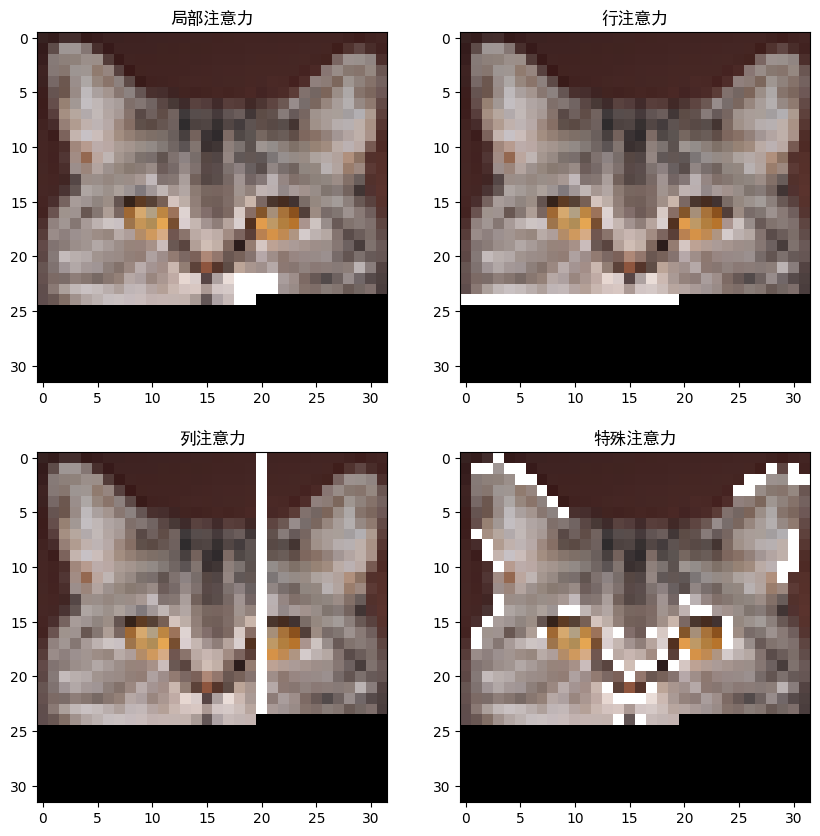

In [2]:
import matplotlib.pyplot as plt
import cv2
import matplotlib
import numpy as np
from PIL import Image

# matplotlib.rc("font",family='DejaVu Sans')

# Load the image
img = Image.open('cat32.png')

# Convert the image to numpy array
img_array = np.array(img)

# Create attention mask
attention_mask = np.zeros((32, 32))
attention_mask[:24, :] = 1
attention_mask[24, :20] = 1

# Define the attention masks
local_attention_mask = np.zeros((32, 32))
local_attention_mask[22:26, 18:22] = 1

row_attention_mask = np.zeros((32, 32))
row_attention_mask[24, :] = 1

column_attention_mask = np.zeros((32, 32))
column_attention_mask[:, 20] = 1

# Assuming img_array is a numpy array
# Convert the image to grayscale
img_gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(img_gray, 460, 490)
edges[edges>0] = 1
head_attention_mask = edges

# Define a function to overlay attention mask on the image
def overlay_attention_mask(img_array, attention, mask):
    # Create a 3D attention mask with the same size as the image
    attention_3d = np.zeros(img_array.shape)
    mask_3d = np.zeros(img_array.shape)
    for i in range(4):
        attention_3d[:, :, i] = attention
        if i < 3: mask_3d[:, :, i] = mask
        if i == 3: mask_3d[:, :, i] = 1

    # Overlay the attention mask on the image
    overlay = (img_array * (1 - attention_3d) + attention_3d * 255) * mask_3d
    return overlay.astype(np.uint8)

# Overlay the attention masks on the image
local_overlay = overlay_attention_mask(img_array, local_attention_mask, attention_mask)
row_overlay = overlay_attention_mask(img_array, row_attention_mask, attention_mask)
column_overlay = overlay_attention_mask(img_array, column_attention_mask, attention_mask)
head_overlay = overlay_attention_mask(img_array, head_attention_mask, attention_mask)

# Plot the overlays
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(local_overlay)
ax[0, 0].set_title('局部注意力', fontdict={'fontname': 'SimHei'})
ax[0, 1].imshow(row_overlay)
ax[0, 1].set_title('行注意力', fontdict={'fontname': 'SimHei'})
ax[1, 0].imshow(column_overlay)
ax[1, 0].set_title('列注意力', fontdict={'fontname': 'SimHei'})
ax[1, 1].imshow(head_overlay)
ax[1, 1].set_title('特殊注意力', fontdict={'fontname': 'SimHei'})

plt.savefig('sparse_attention.png', dpi=600, bbox_inches='tight')